# 10-5-3 network decay tests

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
dtype = torch.float
device = torch.device("cpu")
device = torch.device("cuda:0") # Uncomment this to run on GPU
import NeuralNetwork as NN
import Layer
import importlib
import time
from IPython.display import display
from ipywidgets import FloatProgress
from copy import deepcopy
importlib.reload(NN)
importlib.reload(Layer);

In [2]:
def ClassPlot(x, labels=[], idx=(1,2)):
    # FeedForward
    #yc = Network.OneHot(y)
    if len(labels)>0:
        colour_options = ['y', 'r', 'g', 'b', 'k']
        cidx = np.argmax(labels, axis=1)
        colours = [colour_options[k] for k in cidx]
        plt.scatter(x[:,idx[0]], x[:,idx[1]], color=colours, marker='.')
    else:
        plt.scatter(x[:,idx[0]], x[:,idx[1]], marker='.')
    plt.axis('equal');

## Create a simple dataset

In [89]:
# This creates a dataset

n_classes = 3
hidden_dim = 5
sensory_dim = 10

seed = 29561
torch.manual_seed(seed)
np.random.seed(seed)
B = np.eye(n_classes)
X = 3.*(np.random.rand(sensory_dim, n_classes) - 0.5)
A = X.T
print('Bottom vectors')
print(B)
print('Top vectors')
print(A)
#print('System matrix:\n'+str(M))

Bottom vectors
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Top vectors
[[-0.34431496 -1.30261288  1.2664801  -1.2608779  -1.26086995 -1.00836156
   1.45235195 -1.22394346 -0.99684213  1.28417736]
 [ 0.20152066  1.28678059  0.14688571 -1.40900523 -0.59592629 -0.05049101
  -0.10055794  1.18624446  0.14322608  0.63868269]
 [-0.4448297   1.05952716  0.23670284  0.09324312  0.14226337 -0.28313644
   0.10735313 -0.58312719 -0.89823956 -0.85881006]]


In [90]:
# Use A and B to make a dataset
n_classes, top_dim = np.shape(A)
bottom_dim = n_classes

training_samples = 500
noise = 0.2
training_input = []
training_output = []
for n in range(training_samples):
    r = np.random.randint(n_classes)
    training_input.append(B[r])
    training_output.append(A[r]+noise*np.random.normal(size=np.shape(A[r])))

training_input = torch.tensor(training_input).float().to(device)
training_output = torch.tensor(training_output).float().to(device)
train = [training_input, training_output]

In [91]:
# Use A and B to make a dataset
def MakeDataset(A, B, n=300, noise=0.2):
    n_classes, top_dim = np.shape(A)
    bottom_dim = n_classes

    training_samples = n
    #noise = 0.2
    training_input = []
    training_output = []
    for n in range(training_samples):
        r = np.random.randint(n_classes)
        training_input.append(B[r])
        training_output.append(A[r]+noise*np.random.normal(size=np.shape(A[r])))

    training_input = torch.tensor(training_input).float().to(device)
    training_output = torch.tensor(training_output).float().to(device)
    train = [training_input, training_output]
    return train

In [92]:
train = MakeDataset(A, B)

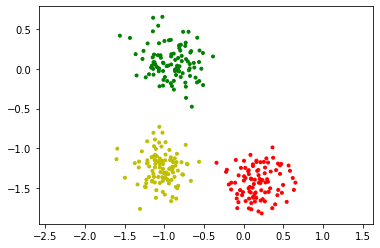

In [93]:
ClassPlot(train[1].cpu(), labels=train[0].cpu(), idx=(8,3))

## Create a Neural Network

In [101]:
print(len(net_decay))

20


In [95]:
reinitialize = True
iters = 20

In [ ]:
if reinitialize:
    v_decay = []
    v_nodecay = []

    net_nodecay = []
    net_decay = []
    
seed = 583 #678 #900 #314
torch.manual_seed(seed)

for k in range(iters):
    train = MakeDataset(A, B, n=500)
    
    net = NN.NeuralNetwork()
    net.AddLayer(Layer.InputPELayer(n=n_classes))
    net.AddLayer(Layer.PELayer(n=hidden_dim))
    net.AddLayer(Layer.TopPELayer(n=sensory_dim))

    sym = False
    af = 'identity'
    net.Connect(0, 1, act=af, symmetric=sym)
    net.Connect(1, 2, act=af, symmetric=sym)

    net.SetTau(0.2)
    net.learning_tau = 0.08
    net.learn_biases = False

    # Make two copies
    net0 = deepcopy(net)
    net1 = deepcopy(net)

    net0.SetWeightDecay(0.)
    net0.SetvDecay(0.)
    #net0.Learn(torch.tensor(train[0]).float().to(device), torch.tensor(train[1]).float().to(device), T=5., dt=0.001, epochs=10, batch_size=25)
    net0.Learn(train[0], train[1], T=5., dt=0.001, epochs=10, batch_size=25)
    
    net1.SetWeightDecay(0.05)
    net1.SetvDecay(0.05)
    #net1.Learn(torch.tensor(train[0]).float().to(device), torch.tensor(train[1]).float().to(device), T=5., dt=0.001, epochs=10, batch_size=25)
    net1.Learn(train[0], train[1], T=5., dt=0.001, epochs=10, batch_size=25)
    '''
    net0.Allocate(B)
    net0.Reset()
    net0.layers[0].SetFF()
    net0.layers[-1].SetFF()
    y0 = net0.Predict(5., torch.tensor(B).float().to(device), dt=0.001)
    
    net1.Allocate(B)
    net1.Reset()
    net1.layers[0].SetFF()
    net1.layers[-1].SetFF()
    net1.SetvDecay(0.05)
    y1 = net1.Predict(5., torch.tensor(B).float().to(device), dt=0.001)
    '''
    net_nodecay.append(deepcopy(net0))
    net_decay.append(deepcopy(net1))
    
    #v_nodecay.append(net0.layers[1].v.cpu().numpy())
    #v_decay.append(net1.layers[1].v.cpu().numpy())

    #v_nodecay.append(net0.connections[0].M)
    #v_decay.append(net1.connections[0].M)
    

identity
identity


FloatProgress(value=0.0, max=5000.0)

# Decay vs No Decay: Equilibrium from random initial states

In [108]:
classes = np.eye(3)
print(classes)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [111]:
net0 = net_nodecay[-1]
net0.Allocate(classes)

net1 = net_decay[-1]
net1.Allocate(classes)
net1.Reset()
net1.SetvDecay(0.04)
net1.SetBidirectional()
net1.layers[0].SetFF()

for l in range(0, len(net0.layers)):
    net0.layers[l].v = torch.randn_like(net0.layers[l].v).float().to(device)
    net1.layers[l].v = deepcopy(net0.layers[l].v)
    #print(net1.layers[l].v)

z = net1.Predict(25., torch.tensor(classes).float().to(device), dt=0.001, dampen_v_decay=False, v_decay_dampener=1.0, dampen_every_T=1.0)
print(net1.layers[-1].v)

tensor([[-0.5009, -0.4006,  0.4776, -0.4251, -0.1553, -0.5718,  0.9090, -0.4444,
         -0.0753,  0.4908],
        [-0.1303,  0.9730, -0.4029, -1.0433, -0.0354, -0.1986,  0.3598,  0.8444,
          0.4288,  0.2377],
        [-0.1268,  0.7067,  0.7756, -0.1254,  0.4402, -0.0967, -0.6735, -0.7996,
         -0.9646, -0.5338]], device='cuda:0')


In [ ]:
gen_nodecay = []
gen_decay = []

similarity_nodecay = []
similarity_decay = []

num_initial_states = 30

fp = FloatProgress(min=0,max=num_initial_states*len(net_decay))
display(fp)

'''
for i in range (0, num_initial_states):
    arbitrary_net = net_nodecay[0]
    arbitrary_net.Allocate(classes)
    
    initial_states = []
    for l in range(0, len(arbitrary_net.layers)):
        initial_states.append(torch.randn_like(arbitrary_net.layers[l].v))
    
    for k in range (0, len(net_decay)):
        net0 = net_nodecay[k-1]
        net1 = net_decay[k-1]

        net0.Allocate(classes)
        net0.Reset()
        net0.SetBidirectional()
        net0.SetvDecay(0.04)
        net0.layers[0].SetFF()   # Clamp bottom layer to class vector

        net1.Allocate(classes)
        net1.Reset()
        net1.SetBidirectional()
        net1.SetvDecay(0.04)
        net1.layers[0].SetFF()   
    
        for l in range(0, len(net0.layers)):
            net0.layers[l].v = deepcopy(initial_states[l])
            net1.layers[l].v = deepcopy(initial_states[l])
'''
for k in range (0, len(net_decay)):
    net0 = net_nodecay[k]
    net1 = net_decay[k]

    net0.Allocate(classes)
    net0.SetBidirectional()
    net0.SetvDecay(0.04)
    net0.layers[0].SetFF()   # Clamp bottom layer to class vector

    net1.Allocate(classes)
    net1.SetBidirectional()
    net1.SetvDecay(0.04)
    net1.layers[0].SetFF()   

    for i in range (0, num_initial_states):
        net0.Reset()
        net1.Reset()
    
        for l in range(0, len(net0.layers)):
            net0.layers[l].v =  torch.tensor(3.*(np.random.rand(net0.layers[l].v.shape[0], net0.layers[l].v.shape[1]) - 0.5)).float().to(device) #torch.randn_like(net0.layers[l].v).float().to(device)
            net1.layers[l].v = deepcopy(net0.layers[l].v)
    
        z0 = net0.Predict(25., torch.tensor(classes).float().to(device), dt=0.001)
        gen_nodecay.append(deepcopy(z0))
    
        z1 = net1.Predict(25., torch.tensor(classes).float().to(device), dt=0.001)
        gen_decay.append(deepcopy(z1))
    
        #Calculate correlation between the generated and ideal vectors
        for j in range (0, 3): #3 = number of classes
            generated = z0[j].cpu().numpy()
            similarity_nodecay.append(np.dot(generated, A[j]) / (np.linalg.norm(generated)*np.linalg.norm(A[j])))
            
            generated = z1[j].cpu().numpy()
            similarity_decay.append(np.dot(generated, A[j]) / (np.linalg.norm(generated)*np.linalg.norm(A[j])))
            
        fp.value += 1

FloatProgress(value=0.0, max=600.0)

In [ ]:
similarity_nodecay = []
similarity_decay = []

for k in range(0, 20):
    for i in range(0, 30):
        for j in range(0, 3):
            generated_nd = gen_nodecay[k][i][j].cpu().numpy()
            similarity_nodecay.append(np.dot(generated, A[j]) / (np.linalg.norm(generated)*np.linalg.norm(A[j])))
            
            generated_d = gen_decay[k][i][j].cpu().numpy()
            similarity_decay.append(np.dot(generated, A[j]) / (np.linalg.norm(generated)*np.linalg.norm(A[j])))

In [52]:
print(np.mean(similarity_nodecay))
print(np.mean(similarity_decay))

NameError: name 'similarity_nodecay' is not defined

In [57]:
print(len(gen_decay))
print(gen_decay)

200
[tensor([[ 0.2786, -0.8073, -0.5031, -1.2368,  0.3321, -0.4699, -0.7973, -0.4521,
         -0.1943, -0.0125],
        [-0.4273,  0.3925, -0.1776, -0.1513, -0.7589,  0.6437,  0.1731, -1.0428,
         -0.8378, -0.1719],
        [-0.2500, -0.9662, -0.4793,  0.6049,  0.3273,  0.2316,  0.2731,  0.5961,
         -1.0609, -0.1152]], device='cuda:0')
 tensor([[ 1.0328, -0.6628, -0.7007, -0.2271,  1.0871, -0.2410, -0.2111, -0.9674,
         -0.0122,  0.4166],
        [-0.3115,  0.2685, -0.4903,  0.2121, -0.4403,  0.2448, -0.0693, -1.0733,
         -0.4050, -1.0645],
        [-0.6659, -0.5031, -0.5020, -0.2529,  0.5908,  0.7789,  0.4793,  0.3330,
         -0.7968, -0.1329]], device='cuda:0')
 tensor([[ 0.4753, -0.4979,  0.3170, -0.0917,  0.1915, -0.0199, -1.1538, -0.6618,
         -1.0499,  1.1140],
        [-0.1752,  0.4924, -0.4915, -0.0271, -0.9681,  0.0446, -0.0453, -0.6204,
         -1.0483, -0.1964],
        [-0.6196, -0.6005, -0.7822, -0.4179,  0.1122,  0.8768, -0.0485,  0.7047,
    

In [59]:
gen_d = []
for i in range (0, len(net_decay)):
    
    d = []
    for j in range(0, num_initial_states):
        d.append(gen_decay[i*num_initial_states+j].cpu().numpy())
        
    gen_d.append(d)

NameError: name 'num_initial_states' is not defined

In [4]:
gen_d = []
for i in range (0, 20):
    
    d = []
    for j in range(0, 10):
        for k in range(0, 3):   
            d.append(gen_decay[i*10+j].cpu().numpy().flatten())
        
    gen_d.append(d)

In [ ]:
[[array([[ 0.27863863, -0.80726326, -0.50312793, -1.2368429 ,  0.3321148 ,
        -0.46990368, -0.7972797 , -0.45214552, -0.1942532 , -0.0124862 ],
       [-0.42727825,  0.3924591 , -0.1776007 , -0.15130018, -0.7589455 ,
         0.64374846,  0.17314798, -1.0427749 , -0.83775806, -0.17187382],
       [-0.25001526, -0.9661516 , -0.4792596 ,  0.60493076,  0.32729092,
         0.2315921 ,  0.273081  ,  0.5960845 , -1.0608735 , -0.11520116]],

In [149]:
#20 nets, 30 initial states, 3 classes, 10 neurons

#or

#20 nets, 30 initial states, 30 neurons (10 per class)

print(gen_d)

[[array([ 0.27863863, -0.80726326, -0.50312793, -1.2368429 ,  0.3321148 ,
       -0.46990368, -0.7972797 , -0.45214552, -0.1942532 , -0.0124862 ,
       -0.42727825,  0.3924591 , -0.1776007 , -0.15130018, -0.7589455 ,
        0.64374846,  0.17314798, -1.0427749 , -0.83775806, -0.17187382,
       -0.25001526, -0.9661516 , -0.4792596 ,  0.60493076,  0.32729092,
        0.2315921 ,  0.273081  ,  0.5960845 , -1.0608735 , -0.11520116],
      dtype=float32), array([ 0.27863863, -0.80726326, -0.50312793, -1.2368429 ,  0.3321148 ,
       -0.46990368, -0.7972797 , -0.45214552, -0.1942532 , -0.0124862 ,
       -0.42727825,  0.3924591 , -0.1776007 , -0.15130018, -0.7589455 ,
        0.64374846,  0.17314798, -1.0427749 , -0.83775806, -0.17187382,
       -0.25001526, -0.9661516 , -0.4792596 ,  0.60493076,  0.32729092,
        0.2315921 ,  0.273081  ,  0.5960845 , -1.0608735 , -0.11520116],
      dtype=float32), array([ 0.27863863, -0.80726326, -0.50312793, -1.2368429 ,  0.3321148 ,
       -0.469903

In [5]:
print(gen_d[0][0][0])

0.27863863


In [6]:
#Manually calculate std
mean = 0

for j in range(0, 30):
    mean += gen_d[13][j][24]

mean /= 30
print(mean)

0.3688829354941845


In [7]:
std = 0
#for i in range(0, 20):
for j in range(0, 30):
    std += (gen_d[13][j][24] - mean)**2
std = np.sqrt(std/30)
print(std)

0.3687413006985206


In [16]:
#20 nets, 30 neural states

gen_d_std = np.std(gen_d, axis=1).flatten()

In [17]:
print(gen_d_std[414])

0.36874133


In [8]:
gen_nd = []
for i in range (0, 20):
    
    nd = []
    for j in range(0, 10):
        for k in range(0, 3):   
            nd.append(gen_nodecay[i*10+j].cpu().numpy().flatten())
        
    gen_nd.append(nd)

In [ ]:
gen_nd = []
for i in range (0, len(net_decay)):
    
    d = []
    for j in range(0, num_initial_states):
        d.append(gen_nodecay[i*num_initial_states+j].cpu().numpy())
        
    gen_nd.append(d)

In [9]:
gen_nd_std = np.std(gen_nd, axis=1)

In [10]:
#np.mean((np.std(gen_nd, axis=1)).flatten())
np.mean(gen_nd_std)

0.7032103

In [11]:
#np.max((np.std(gen_nd, axis=1)).flatten())
np.max(gen_nd_std)

2.7156563

In [12]:
#np.mean((np.std(gen_d, axis=1)).flatten())
np.mean(gen_d_std)

NameError: name 'gen_d_std' is not defined

In [13]:
#np.max((np.std(gen_d, axis=1)).flatten())
np.max(gen_d_std)

NameError: name 'gen_d_std' is not defined

In [51]:
print(n)
print(bins)

[ 16. 110. 181. 111.  63.  32.  26.  22.   7.  10.   5.   3.   1.   1.
   2.   1.   1.   0.   3.   1.   1.   1.   1.   1.]
[0.10509563 0.22820082 0.351306   0.47441119 0.59751637 0.72062156
 0.84372675 0.96683193 1.08993712 1.21304231 1.33614749 1.45925268
 1.58235787 1.70546305 1.82856824 1.95167342 2.07477861 2.1978838
 2.32098898 2.44409417 2.56719936 2.69030454 2.81340973 2.93651491
 3.0596201 ]


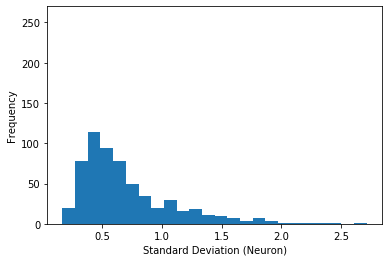

In [20]:
plt.rcParams["font.family"] = "Times New Roman"
n, bins, patches = plt.hist(gen_nd_std.flatten(), bins=24);
a = plt.axis()
plt.xlabel('Standard Deviation (Neuron)')
plt.ylabel('Frequency')
plt.ylim(0, 270)

plt.savefig("nodecay_net_std_randinit.pdf", format='pdf')

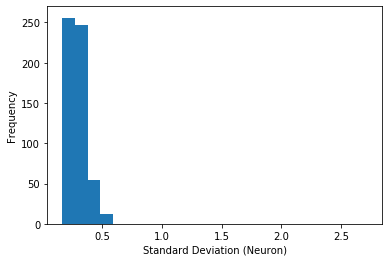

In [19]:
plt.rcParams["font.family"] = "Times New Roman"
plt.hist(gen_d_std.flatten(), bins=bins);
#a = plt.axis()
plt.axis(a)
plt.xlabel('Standard Deviation (Neuron)')
plt.ylabel('Frequency')
plt.ylim(0, 270)

plt.savefig("decay_net_std_randinit.pdf", format='pdf')

In [41]:
print(len(gen_nd_std.flatten()))

600


In [4]:
gen_nd_std = np.asarray([[[0.37091014, 0.2102907 , 0.47582874, 0.29976684, 0.41585082,
         0.91406107, 0.40806726, 0.5554482 , 0.5001369 , 0.36809975],
        [0.38037667, 0.22006463, 0.4173924 , 0.25203386, 0.40673605,
         0.6291104 , 0.40425506, 0.6397041 , 0.35423258, 0.34978592],
        [0.345517  , 0.21885763, 0.48864582, 0.26145276, 0.43318188,
         0.73306346, 0.47653523, 0.523609  , 0.32739392, 0.33240098]],

       [[1.0523156 , 0.47035998, 0.38907874, 0.4162986 , 0.40495765,
         0.3287226 , 0.34261256, 0.20447579, 0.50028867, 0.4376666 ],
        [1.0523832 , 0.45725322, 0.40137115, 0.4556336 , 0.45439747,
         0.35282454, 0.3416939 , 0.23073752, 0.5293269 , 0.50425535],
        [1.0664687 , 0.5032307 , 0.3713048 , 0.38318464, 0.3998569 ,
         0.40163714, 0.33494923, 0.17066385, 0.5301608 , 0.38233325]],

       [[0.35923722, 0.3483137 , 0.32024008, 0.10509563, 0.48449704,
         0.35721934, 0.41424245, 0.2877551 , 0.38814962, 0.35392076],
        [0.40574616, 0.35805392, 0.4247227 , 0.11002127, 0.5290947 ,
         0.27430594, 0.4346708 , 0.38373744, 0.30274087, 0.29742426],
        [0.38252616, 0.32334703, 0.4621902 , 0.14267412, 0.49130043,
         0.36615542, 0.38586083, 0.36806348, 0.3041441 , 0.3220372 ]],

       [[0.39053828, 0.33736312, 0.62558335, 0.46012247, 1.0841377 ,
         0.54622877, 0.36755627, 0.6600063 , 0.61888224, 0.5397052 ],
        [0.31511384, 0.3159779 , 0.5166757 , 0.49038672, 0.77432346,
         0.5403364 , 0.3738896 , 0.49955347, 0.5670603 , 0.54115397],
        [0.3250898 , 0.30993342, 0.5696926 , 0.54120064, 0.9190902 ,
         0.50997746, 0.3092759 , 0.61353284, 0.61402404, 0.5037434 ]],

       [[1.4824802 , 1.3591793 , 1.2406934 , 0.95852417, 0.44447467,
         2.3517015 , 1.2873296 , 1.3926406 , 1.2194177 , 0.47667024],
        [1.211327  , 1.1625911 , 1.0721467 , 0.7221745 , 0.36435667,
         2.163319  , 1.0463139 , 1.2003158 , 1.0329947 , 0.4786229 ],
        [1.3135693 , 1.3361615 , 1.232913  , 0.92117006, 0.48964038,
         2.342552  , 1.2165018 , 1.3324612 , 1.1972264 , 0.4918164 ]],

       [[0.5862022 , 0.68623954, 1.3699938 , 0.952542  , 0.44167152,
         0.52255636, 0.46390685, 0.5131411 , 0.58686334, 0.5529949 ],
        [0.5228295 , 0.55789936, 1.2698693 , 0.9190372 , 0.41540673,
         0.62883455, 0.43260983, 0.52593726, 0.4577726 , 0.45358118],
        [0.5350759 , 0.5484306 , 1.55221   , 1.0755521 , 0.3877994 ,
         0.53539586, 0.41166353, 0.54784304, 0.46097478, 0.4398042 ]],

       [[0.9916781 , 0.91890126, 0.47270045, 0.25574356, 0.4012748 ,
         0.43117926, 0.3276618 , 1.0865525 , 0.28195903, 0.30898878],
        [1.0173553 , 0.9202287 , 0.5590439 , 0.24521272, 0.4197181 ,
         0.36970305, 0.29473487, 1.1053773 , 0.27353096, 0.29313844],
        [0.81095415, 0.59630585, 0.31333077, 0.31325695, 0.43413574,
         0.43266347, 0.33251438, 0.77854484, 0.28971753, 0.22458236]],

       [[0.44474337, 0.4376979 , 0.4314831 , 0.64562136, 0.4179276 ,
         0.46864548, 0.4773587 , 0.5794992 , 0.28664112, 0.40282634],
        [0.4982372 , 0.5017839 , 0.38739675, 0.74283755, 0.5693358 ,
         0.387788  , 0.46188062, 0.71462065, 0.30235392, 0.43722832],
        [0.40604046, 0.47015953, 0.2698194 , 0.6123028 , 0.4537058 ,
         0.50875294, 0.46560204, 0.56111574, 0.29559913, 0.38403016]],

       [[0.38540033, 0.40289557, 0.61898416, 0.61305386, 0.40154687,
         0.4245293 , 0.76868284, 0.49075955, 0.47935212, 0.41877222],
        [0.37931255, 0.5149294 , 0.49121305, 0.7040225 , 0.40757018,
         0.41857478, 0.8821837 , 0.5370694 , 0.47801116, 0.37492588],
        [0.4459495 , 0.5764486 , 0.7329756 , 0.77946264, 0.47912562,
         0.40110716, 0.926617  , 0.5864187 , 0.56784564, 0.48601162]],

       [[0.644397  , 0.7509586 , 0.3662836 , 0.87522185, 0.44022012,
         0.3985682 , 1.0835104 , 0.21848983, 0.6120101 , 0.3779816 ],
        [0.61630225, 0.83480924, 0.4039891 , 1.0623246 , 0.4751677 ,
         0.5143099 , 1.1595668 , 0.2756101 , 0.652492  , 0.36839828],
        [0.637277  , 0.87140214, 0.39476353, 1.0809    , 0.42320308,
         0.45561022, 1.2193576 , 0.20695186, 0.7398908 , 0.4009048 ]],

       [[0.89366347, 0.6304987 , 0.56878424, 0.46323872, 0.58259517,
         0.77939683, 0.2073698 , 0.64078766, 0.4503232 , 0.2916686 ],
        [0.8546548 , 0.59075534, 0.4278126 , 0.48070025, 0.49343812,
         0.70742536, 0.32848054, 0.6156919 , 0.5640966 , 0.3213108 ],
        [1.022052  , 0.4100261 , 0.43671685, 0.47008213, 0.4809503 ,
         0.89619166, 0.3479803 , 0.7051765 , 0.49807405, 0.23450024]],

       [[0.49178702, 0.21087871, 0.60220987, 0.853007  , 0.32613933,
         0.51129794, 0.6534891 , 0.32204726, 0.62804234, 0.26440206],
        [0.5115476 , 0.25081274, 0.77618885, 0.90686613, 0.41840467,
         0.59936523, 0.531275  , 0.24137865, 0.48911384, 0.20140776],
        [0.6191337 , 0.27619088, 0.8043362 , 1.0276998 , 0.3352795 ,
         0.57971483, 0.7225103 , 0.32212836, 0.6233227 , 0.3390852 ]],

       [[0.529669  , 0.35566854, 0.566452  , 0.21529856, 0.5828952 ,
         0.30719998, 0.24308984, 0.48535597, 0.32908472, 0.27762106],
        [0.8282297 , 0.6800542 , 0.85959333, 0.2961428 , 0.81460774,
         0.33152843, 0.24595568, 0.7494149 , 0.38405266, 0.36022457],
        [0.7583132 , 0.60241234, 0.9513325 , 0.27192697, 1.0574288 ,
         0.3511179 , 0.38772506, 0.6196092 , 0.40706077, 0.32680193]],

       [[0.98393226, 2.5317235 , 1.5943388 , 0.3696451 , 0.67651314,
         0.38127568, 0.87599635, 0.59635663, 0.6487957 , 2.3690743 ],
        [1.0667738 , 2.7556314 , 1.8287419 , 0.3756479 , 0.852192  ,
         0.54734683, 1.0194588 , 0.6070923 , 0.7583245 , 2.5688946 ],
        [1.2178701 , 3.0596201 , 2.068858  , 0.32104638, 0.9257027 ,
         0.53596663, 0.89094615, 0.7361831 , 0.76896906, 2.8338525 ]],

       [[0.9784416 , 0.8603346 , 0.702072  , 0.45304862, 0.60326207,
         0.795079  , 0.6054374 , 0.3722569 , 1.5043174 , 0.6448773 ],
        [1.3574032 , 1.0846138 , 0.7699435 , 0.6006095 , 0.72745174,
         0.7205729 , 0.7251573 , 0.38686493, 1.8926706 , 0.7571898 ],
        [1.204926  , 0.9389919 , 0.730703  , 0.4573429 , 0.6237423 ,
         0.8719305 , 0.6895066 , 0.3952684 , 1.775712  , 0.6361127 ]],

       [[0.59637636, 0.6162404 , 0.2793128 , 0.25262523, 0.54769146,
         0.39332834, 0.8262315 , 0.59365267, 0.48597386, 0.30830878],
        [0.6580788 , 0.60658574, 0.44190386, 0.26762867, 0.40056652,
         0.37117496, 0.6507766 , 0.53879476, 0.5106289 , 0.26663116],
        [0.6215494 , 0.65543205, 0.3197902 , 0.23982376, 0.44044983,
         0.41748986, 0.83323276, 0.5379197 , 0.4518333 , 0.3006428 ]],

       [[0.433859  , 0.35210174, 0.325508  , 0.34252998, 0.260955  ,
         0.3489598 , 0.42555648, 0.30081767, 0.376033  , 0.26747808],
        [0.3670488 , 0.39760718, 0.38480982, 0.42374104, 0.3174854 ,
         0.51754445, 0.4620694 , 0.3279415 , 0.35935473, 0.29747596],
        [0.3044036 , 0.31677088, 0.37911615, 0.33429572, 0.28483143,
         0.3729103 , 0.4295764 , 0.28720665, 0.36901164, 0.31811005]],

       [[0.377118  , 0.43937954, 0.34669322, 0.6722028 , 0.20546876,
         0.24669562, 0.4032468 , 0.51628137, 0.3049342 , 0.44359615],
        [0.5315243 , 0.46678433, 0.47021112, 0.6706835 , 0.2942424 ,
         0.3895644 , 0.4581225 , 0.6908909 , 0.31579894, 0.5237564 ],
        [0.4379775 , 0.5230568 , 0.44928443, 0.6916114 , 0.35401022,
         0.31188086, 0.38531837, 0.5347756 , 0.33738834, 0.39234793]],

       [[0.34688944, 0.5570796 , 0.49237186, 0.35404527, 0.63356256,
         0.39842924, 0.38960028, 0.42741546, 0.4433637 , 0.4508116 ],
        [0.37481403, 0.55809164, 0.54843676, 0.32398435, 0.6626371 ,
         0.4232557 , 0.44401893, 0.40234616, 0.40677467, 0.52412486],
        [0.3375537 , 0.6851412 , 0.6106473 , 0.37360707, 0.8245566 ,
         0.50821835, 0.3870466 , 0.50286895, 0.36267084, 0.5721776 ]],

       [[0.3604697 , 0.36789638, 0.35961884, 0.25788662, 0.45576698,
         0.531498  , 0.5663646 , 0.39639032, 0.4350317 , 0.41145512],
        [0.49902645, 0.41596234, 0.3390246 , 0.26544163, 0.45892394,
         0.5977114 , 0.61494553, 0.30437002, 0.32780245, 0.39705074],
        [0.5016149 , 0.39861023, 0.3028789 , 0.26572508, 0.37395388,
         0.56926763, 0.612678  , 0.2707194 , 0.39573213, 0.36368346]]])

In [5]:
gen_d_std = np.asarray([[[0.26030567, 0.18924284, 0.3136617 , 0.23617926, 0.2925225 ,
         0.35958543, 0.28371903, 0.24305938, 0.34580427, 0.19225684],
        [0.29267833, 0.14684463, 0.2666504 , 0.20167142, 0.2562854 ,
         0.3425541 , 0.30522174, 0.22830842, 0.24443553, 0.21687329],
        [0.26494944, 0.16675316, 0.3112688 , 0.20811304, 0.25561273,
         0.30192408, 0.28785607, 0.2271085 , 0.25315845, 0.21913013]],

       [[0.29415748, 0.173613  , 0.27439773, 0.22697318, 0.30753034,
         0.30264777, 0.31575525, 0.2430863 , 0.19822097, 0.2656806 ],
        [0.3023313 , 0.18784526, 0.3086461 , 0.28312457, 0.28323022,
         0.2952012 , 0.28940892, 0.25825685, 0.2668396 , 0.21879387],
        [0.28690872, 0.1833789 , 0.28795475, 0.30237126, 0.2762455 ,
         0.35442117, 0.25552106, 0.23795201, 0.28796855, 0.30185023]],

       [[0.33156973, 0.15285525, 0.28360984, 0.2053996 , 0.2945437 ,
         0.27234882, 0.29910952, 0.20566785, 0.28217882, 0.21475948],
        [0.23798008, 0.21984936, 0.3215898 , 0.2770462 , 0.21652493,
         0.31322908, 0.25645307, 0.22036554, 0.28266764, 0.24879545],
        [0.35583282, 0.15250269, 0.3042174 , 0.2141019 , 0.32037413,
         0.27366787, 0.28070945, 0.22947627, 0.24445343, 0.21499556]],

       [[0.29402113, 0.1701366 , 0.3193363 , 0.24306819, 0.3327085 ,
         0.26343477, 0.2331392 , 0.2140664 , 0.2917956 , 0.22602436],
        [0.34227276, 0.15524432, 0.33483428, 0.2584312 , 0.32020974,
         0.31258538, 0.30330703, 0.22634666, 0.25684142, 0.2601467 ],
        [0.30214202, 0.15935959, 0.31401613, 0.26904067, 0.30952826,
         0.265026  , 0.32343408, 0.2368789 , 0.28064695, 0.24276493]],

       [[0.33821082, 0.15887713, 0.2746831 , 0.24306132, 0.3083894 ,
         0.29209217, 0.30014086, 0.28502414, 0.2717452 , 0.27532923],
        [0.31373906, 0.1116431 , 0.22738008, 0.20911795, 0.27645218,
         0.282033  , 0.28893885, 0.25920224, 0.20947158, 0.23722406],
        [0.31517687, 0.12876669, 0.3388852 , 0.22357054, 0.310677  ,
         0.28178844, 0.310191  , 0.2346161 , 0.22938983, 0.21781403]],

       [[0.30586538, 0.16840366, 0.3307037 , 0.2776997 , 0.31582624,
         0.23072156, 0.2180591 , 0.28072184, 0.3184498 , 0.23613173],
        [0.27289537, 0.13647106, 0.2581602 , 0.2787116 , 0.29429752,
         0.32002202, 0.3027078 , 0.24674855, 0.255009  , 0.2502068 ],
        [0.30666322, 0.17857915, 0.2897018 , 0.25241715, 0.26764274,
         0.30805743, 0.25009233, 0.23847088, 0.2412015 , 0.22636093]],

       [[0.2882587 , 0.19218345, 0.26729342, 0.22053036, 0.3214587 ,
         0.29859862, 0.29422307, 0.22885291, 0.26412383, 0.26273847],
        [0.32077926, 0.16913879, 0.28126803, 0.20649911, 0.2890606 ,
         0.28311068, 0.32651505, 0.24581288, 0.23986903, 0.28711647],
        [0.30775914, 0.13213785, 0.2861493 , 0.22462517, 0.26188594,
         0.26284614, 0.3225165 , 0.23546182, 0.2643126 , 0.27601534]],

       [[0.30449623, 0.15448332, 0.3391715 , 0.22946712, 0.25819373,
         0.29850763, 0.22594962, 0.25424635, 0.26216403, 0.2659713 ],
        [0.30896226, 0.15017898, 0.30347884, 0.26379362, 0.33090234,
         0.30624118, 0.2759326 , 0.25833902, 0.2712902 , 0.3029759 ],
        [0.27887046, 0.16664976, 0.2510901 , 0.2716363 , 0.26431793,
         0.33699736, 0.28424564, 0.22881576, 0.26015136, 0.23548552]],

       [[0.27764353, 0.19155076, 0.29256058, 0.21861684, 0.31045443,
         0.35550603, 0.23346046, 0.22851719, 0.28013173, 0.20161045],
        [0.29736504, 0.22622666, 0.25682393, 0.24087858, 0.30712795,
         0.31996793, 0.28938264, 0.32504964, 0.2806658 , 0.26573372],
        [0.27583146, 0.2031007 , 0.29240143, 0.269233  , 0.31466293,
         0.26444793, 0.32316434, 0.26920578, 0.25778803, 0.2541666 ]],

       [[0.29942012, 0.1622173 , 0.27616936, 0.21818513, 0.31267843,
         0.2969855 , 0.27205196, 0.19299097, 0.26914203, 0.27268893],
        [0.26575062, 0.15726687, 0.24278407, 0.26993954, 0.30303213,
         0.3020516 , 0.26055962, 0.22097656, 0.30422455, 0.21800439],
        [0.27672932, 0.14442529, 0.25989026, 0.26000094, 0.30886582,
         0.27156112, 0.277424  , 0.2081465 , 0.18603456, 0.25294137]],

       [[0.33753318, 0.15129933, 0.2730627 , 0.2453988 , 0.3162771 ,
         0.29803106, 0.23162234, 0.20653728, 0.29082546, 0.30125153],
        [0.31840122, 0.15032873, 0.30472362, 0.27787992, 0.25776002,
         0.29454014, 0.30462307, 0.23485371, 0.31108618, 0.25581887],
        [0.26039258, 0.11919996, 0.28641403, 0.23389983, 0.30169326,
         0.24488896, 0.29529995, 0.21629238, 0.27009892, 0.24562766]],

       [[0.27200553, 0.14245   , 0.2350809 , 0.27912626, 0.24639615,
         0.2864031 , 0.25144032, 0.26141432, 0.25937793, 0.24715684],
        [0.30548793, 0.13007042, 0.29781368, 0.2078296 , 0.2652475 ,
         0.25950065, 0.21000086, 0.23892908, 0.28399366, 0.22935213],
        [0.23122455, 0.15311407, 0.3361995 , 0.23444875, 0.31336683,
         0.30550402, 0.30717596, 0.20176536, 0.26615527, 0.3129334 ]],

       [[0.30035722, 0.15545064, 0.23594606, 0.21733999, 0.30144277,
         0.28457063, 0.2461115 , 0.24196172, 0.26659453, 0.23152493],
        [0.29701632, 0.18812485, 0.2739648 , 0.24749765, 0.3188308 ,
         0.27534524, 0.27568617, 0.21353458, 0.27697393, 0.21341163],
        [0.21977636, 0.13535585, 0.2785269 , 0.2353122 , 0.30271256,
         0.27545246, 0.30209792, 0.16598442, 0.2658368 , 0.24932751]],

       [[0.29977387, 0.18472518, 0.30284482, 0.26725405, 0.29017356,
         0.274209  , 0.32182202, 0.23841934, 0.24919634, 0.22902179],
        [0.29546514, 0.20231836, 0.29467764, 0.25847393, 0.24501267,
         0.30787897, 0.2637934 , 0.21455283, 0.23022127, 0.2319625 ],
        [0.30875504, 0.15883847, 0.29126248, 0.23414642, 0.26564923,
         0.3363771 , 0.33733365, 0.2114875 , 0.25553414, 0.2284971 ]],

       [[0.29922038, 0.14399162, 0.3237841 , 0.2748276 , 0.2922764 ,
         0.32872996, 0.31920955, 0.27281642, 0.27060634, 0.2425294 ],
        [0.37300318, 0.1413453 , 0.31611687, 0.2689675 , 0.30414826,
         0.27005443, 0.30163923, 0.2351314 , 0.25811434, 0.22627999],
        [0.3337798 , 0.13930188, 0.28876215, 0.23431566, 0.25607368,
         0.27778885, 0.29785085, 0.23081934, 0.24935608, 0.24744415]],

       [[0.316313  , 0.22029734, 0.2373006 , 0.25526568, 0.25223264,
         0.29779336, 0.22895417, 0.24333894, 0.26682118, 0.28810722],
        [0.30665097, 0.18611352, 0.3317119 , 0.23039271, 0.32732064,
         0.28672442, 0.3090309 , 0.27353182, 0.28203028, 0.23271666],
        [0.29540715, 0.19186136, 0.2640344 , 0.24309403, 0.21269795,
         0.27573428, 0.32759422, 0.270369  , 0.24684381, 0.20954347]],

       [[0.2612216 , 0.19136491, 0.26482558, 0.22773342, 0.27036545,
         0.29511765, 0.27259824, 0.22219552, 0.30349317, 0.2369685 ],
        [0.25224644, 0.20837274, 0.2916078 , 0.25424728, 0.2863283 ,
         0.3133367 , 0.24855262, 0.1908019 , 0.2308159 , 0.20164488],
        [0.26347813, 0.19120586, 0.29108498, 0.22167158, 0.24541813,
         0.31313333, 0.29461136, 0.20208357, 0.2207869 , 0.23279369]],

       [[0.31353143, 0.12860467, 0.26862973, 0.21559286, 0.23587622,
         0.27132115, 0.2513402 , 0.21174875, 0.24866427, 0.30454385],
        [0.29849508, 0.18097842, 0.29354665, 0.21791255, 0.28491262,
         0.29047266, 0.27714565, 0.2381441 , 0.29578587, 0.30112067],
        [0.31186232, 0.17968452, 0.3006719 , 0.21630602, 0.33307785,
         0.30847242, 0.31886858, 0.22018614, 0.26465008, 0.27797827]],

       [[0.28357977, 0.15718098, 0.30993477, 0.28915045, 0.31405443,
         0.23931661, 0.27200732, 0.26384693, 0.27321056, 0.2376642 ],
        [0.2986665 , 0.15045092, 0.3221886 , 0.24216372, 0.2828022 ,
         0.30308458, 0.2542502 , 0.22240539, 0.272566  , 0.2563    ],
        [0.32352346, 0.12521122, 0.2967545 , 0.25215843, 0.2999454 ,
         0.26476794, 0.28056967, 0.28424743, 0.25104687, 0.21366642]],

       [[0.30480376, 0.15291177, 0.2979937 , 0.23888981, 0.30514652,
         0.26759145, 0.31697664, 0.27943295, 0.22754642, 0.2624233 ],
        [0.3213025 , 0.15546934, 0.3376159 , 0.2276015 , 0.26971924,
         0.23272495, 0.28437158, 0.24761082, 0.19376169, 0.2377329 ],
        [0.3162569 , 0.16842747, 0.2954139 , 0.20829225, 0.27940243,
         0.29419503, 0.298476  , 0.24575633, 0.25131008, 0.24913892]]])

In [50]:
np.save('gen_decay.npy', gen_decay)
np.save('gen_nodecay.npy', gen_nodecay)

In [3]:
gen_decay = np.load('gen_decay.npy', allow_pickle=True)
gen_nodecay = np.load('gen_nodecay.npy', allow_pickle=True)

In [152]:
v_decay

[array([[ 1.1062113 ,  0.33149195, -0.12361781, -0.360006  ,  0.1583065 ],
        [-0.38733855,  1.0158045 , -0.68914914,  0.2295159 ,  0.3978937 ],
        [ 0.13768099,  0.16811174, -0.48704946,  0.10151093, -1.0861152 ]],
       dtype=float32),
 array([[-0.5161557 ,  0.97477686, -0.28765664, -0.23225579,  0.76227957],
        [-0.21930213,  0.13475649,  0.8851758 ,  0.7353409 ,  0.20161708],
        [-0.8006614 ,  0.16985182, -0.43374062,  0.48273063, -0.6916553 ]],
       dtype=float32),
 array([[ 0.6549607 , -0.10592052, -0.6552135 ,  0.91456914,  0.09022055],
        [-0.7144942 , -0.5533034 ,  0.28572333,  0.6691012 , -0.52274334],
        [ 0.6503851 ,  0.25789738,  0.8734033 ,  0.29799825, -0.37222925]],
       dtype=float32),
 array([[-0.4046293 ,  0.28522384,  0.0702487 , -0.9958117 ,  0.57329524],
        [-0.7079081 , -0.23137802, -0.90256923, -0.0789312 , -0.4555892 ],
        [-0.65191215, -0.75341207,  0.30711278,  0.38418734,  0.6401763 ]],
       dtype=float32),
 arr

In [158]:
vd = np.array([v.reshape((1,15))[0] for v in v_decay])

print(np.average(vd, axis=0))
print(np.std(vd, axis=0))

[ 0.06537823  0.171267    0.01080558 -0.0367504   0.06169184 -0.11801361
  0.04278171  0.13552238 -0.1606514   0.26108405  0.08857244  0.02133609
  0.00547642  0.15858914 -0.13559023]
[0.5248798  0.5391179  0.48641557 0.6125287  0.6165755  0.4044915
 0.6451697  0.5862508  0.56233716 0.5212877  0.7509979  0.53172606
 0.51742154 0.3944442  0.51350564]


In [159]:
vnd = np.array([v.reshape((1,15))[0] for v in v_nodecay])

print(np.average(vnd, axis=0))
print(np.std(vnd, axis=0))

[-0.09696052  0.7136089  -0.4487478   0.23616531  0.05050614 -0.11024121
 -0.1813967   0.6741838   0.35939062  0.08353204  0.30285394 -0.17353532
  0.16478105 -0.26647744  0.27717677]
[0.6508415  1.0037161  0.76309735 1.0464902  1.4398936  0.3559184
 1.118279   0.79441416 1.3221036  1.2351139  0.8999203  1.4407139
 1.6066176  1.1394042  1.3108555 ]


In [165]:
np.save('v_decay.npy', v_decay)
np.save('v_nodecay.npy', v_nodecay)

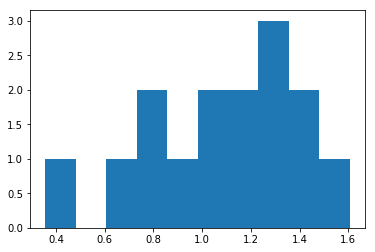

In [163]:
plt.hist(np.std(vnd, axis=0));
a = plt.axis()

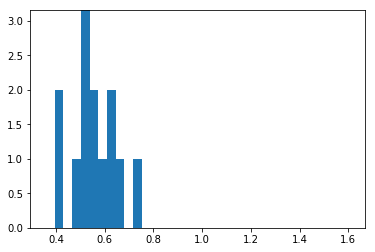

In [164]:
plt.hist(np.std(vd, axis=0));
plt.axis(a);

In [112]:
Md2 = np.array([M.reshape((1,6)).cpu().numpy()[0] for M in Mdecay])
avg = np.average(Md2, axis=0)
std = np.std(Md2, axis=0)
print(avg)
print(np.average(std))
print(std/avg)

[ 0.4619959  -0.03735783 -0.16273674 -0.16516834 -0.4957078   0.5206892 ]
0.031510346
[ 0.07478373 -0.93977255 -0.2266518  -0.1965764  -0.0597735   0.03922006]


In [93]:
np.save('Mdecay', Md2)

In [109]:
#Md2 = np.load('Mdecay.npy')

In [113]:
Mn2 = np.array([M.reshape((1,6)).cpu().numpy()[0] for M in Mnodecay])
avg = np.average(Mn2, axis=0)
std = np.std(Mn2, axis=0)
print(avg)
print(np.average(std))
print(std/avg)

[ 0.48320866 -0.04314312 -0.20838003 -0.10080512 -0.5954973   0.6029325 ]
0.1457171
[ 0.3520549  -2.7804155  -1.1377933  -1.615167   -0.1822552   0.12569869]


In [95]:
np.save('Mnodecay', Mn2)

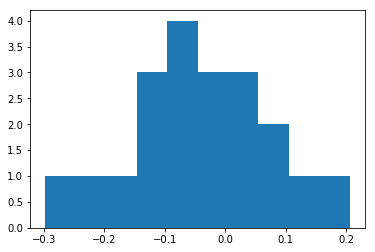

In [122]:
idx = 1
plt.hist(Mn2[:,idx], bins=10)
a = plt.axis()

(-0.3224999330937862, 0.2309109441936016, 0.0, 4.2)

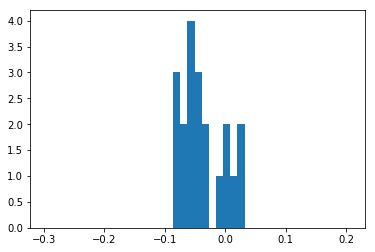

In [123]:
plt.hist(Md2[:,idx], bins=10)
plt.axis(a)

## Error Nodes During Inference

In [11]:
idx = len(train[1])
netx = net0
netx.SetBidirectional()
netx.layers[0].SetFF()   # Clamp bottom layer to class vector
netx.Infer(5., train[0][:idx], train[1][:idx], dt=0.002)
netx.PEError()

tensor(1.00000e-02 *
       1.7783)

In [12]:
# This will be big before training
torch.mean(netx.layers[0].e, 0)

tensor(1.00000e-02 *
       [ 0.9604, -1.0983])

In [13]:
# This can be as low as the standard deviation used to create the dataset
# Namely, the value of the variable 'noise'
torch.std(netx.layers[0].e, 0)

tensor([ 0.0813,  0.1016])

In [14]:
torch.mean(netx.layers[1].e, 0)

tensor(1.00000e-02 *
       [ 1.7620,  0.3577, -1.3814])

In [15]:
netx = net1
netx.SetBidirectional()
netx.layers[0].SetFF()   # Clamp bottom layer to class vector
netx.Infer(5., train[0][:idx], train[1][:idx], dt=0.002)
netx.PEError()

tensor(1.00000e-02 *
       1.5008)

In [16]:
# This will be big before training
torch.mean(netx.layers[0].e, 0)

tensor(1.00000e-02 *
       [ 2.0314, -0.2920])

In [17]:
# This can be as low as the standard deviation used to create the dataset
# Namely, the value of the variable 'noise'
torch.std(netx.layers[0].e, 0)

tensor([ 0.0953,  0.1169])

In [18]:
torch.mean(netx.layers[1].e, 0)

tensor(1.00000e-03 *
       [ 5.5261, -8.5028,  4.1186])

## Norm of the weight matrix

In [19]:
print('  No Decay: '+str(torch.norm(net0.connections[0].M).item()))
print('With Decay: '+str(torch.norm(net1.connections[0].M).item()))

  No Decay: 1.1463209390640259
With Decay: 0.8969218134880066


In [22]:
#print('Original M:\n'+str(np.array(Morig.T)))
print('No Decay M:\n'+str(np.array(net0.connections[0].M)))
print('Decay M:\n'+str(np.array(net1.connections[0].M)))

No Decay M:
[[ 0.41317642 -0.47223037]
 [-0.3778134   0.48322648]
 [ 0.19322935  0.7118617 ]]
Decay M:
[[ 0.37590605 -0.06995936]
 [-0.2994407   0.60851824]
 [ 0.21068391  0.398154  ]]


In [20]:
#print('Original M:\n'+str(np.array(Morig.T)))
print('No Decay M:\n'+str(np.array(net0.connections[0].M)))
print('Decay M:\n'+str(np.array(net1.connections[0].M)))

No Decay M:
[[ 0.41317642 -0.47223037]
 [-0.3778134   0.48322648]
 [ 0.19322935  0.7118617 ]]
Decay M:
[[ 0.3157452  -0.00958139]
 [-0.3512871   0.62426686]
 [ 0.2575782   0.3538695 ]]


In [14]:
#print('Original M:\n'+str(np.array(Morig.T)))
print('No Decay M:\n'+str(np.array(net0.connections[0].M)))
print('Decay M:\n'+str(np.array(net1.connections[0].M)))

No Decay M:
[[ 0.60184    -0.785012  ]
 [-0.2856807   0.32242113]
 [ 0.03190309  1.0155517 ]]
Decay M:
[[ 0.2878595   0.06308512]
 [-0.32321948  0.60671866]
 [ 0.25037074  0.36894363]]


## Classification Accuracy

In [21]:
# net0.connections[0].M = torch.tensor(Morig.T,dtype=torch.float)
# net1.connections[0].M = torch.tensor(Morig.T,dtype=torch.float)
# net0.connections[0].W = torch.tensor(Morig,dtype=torch.float)
# net1.connections[0].W = torch.tensor(Morig,dtype=torch.float)

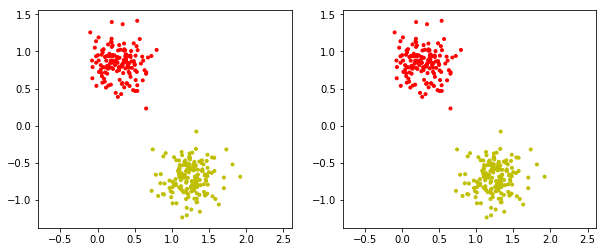

In [23]:
mu0 = net0.Generate(5., train[1], dt=0.001)
mu1 = net1.Generate(5., train[1], dt=0.001)

fig = plt.figure(figsize=(10,4))
plt.subplot(1,2,1); ClassPlot(train[1], labels=mu0, idx=(0,1))
plt.subplot(1,2,2); ClassPlot(train[1], labels=mu1, idx=(0,1))

## Generative Mode

In [24]:
net0.Reset()
net0.layers[0].SetFF()
net0.layers[-1].SetFF()

y0 = net0.Predict(5., train[0], dt=0.001)

In [27]:
net1.Reset()
net1.layers[0].SetFF()
net1.layers[-1].SetFF()
net1.SetvDecay(0.05)
y1 = net1.Predict(5., train[0], dt=0.001)

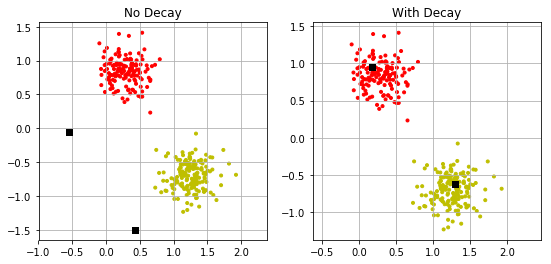

In [28]:
fig = plt.figure(figsize=(9,4))

idx = (0,1)
plt.subplot(1,2,1);
ClassPlot(train[1], labels=train[0], idx=idx); plt.grid('on')
plt.plot(np.array(y0[:,idx[0]]), np.array(y0[:,idx[1]]), 'ks');
plt.title('No Decay');

plt.subplot(1,2,2);
ClassPlot(train[1], labels=train[0], idx=idx); plt.grid('on')
plt.plot(np.array(y1[:,idx[0]]), np.array(y1[:,idx[1]]), 'ks');
plt.title('With Decay');

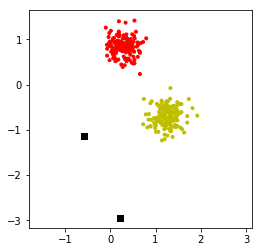

In [26]:
fig = plt.figure(figsize=(4,4))

idx = (0,1)
ClassPlot(train[1], labels=train[0], idx=idx);

plt.plot(np.array(y0[:,idx[0]]), np.array(y0[:,idx[1]]), 'ks');

In [27]:
ErrNoDecay = torch.norm(y0 - train[1].float()).item()/np.shape(y0)[0]
print('Error (no decay):   '+str(ErrNoDecay))
ErrDecay = torch.norm(y1 - train[1].float()).item()/np.shape(y1)[0]
print('Error (with decay): '+str(ErrDecay))

Error (no decay):   0.1363491439819336
Error (with decay): 0.022857635815938315


In [28]:
torch.mean(net0.layers[1].v-train[1], dim=0)

tensor([-0.9680, -2.1175, -0.1131])

In [29]:
torch.mean(net1.layers[1].v-train[1], dim=0)

tensor(1.00000e-02 *
       [-0.8147, -2.1844, -1.4329])

In [209]:
net0.layers[0].e

tensor([[-0.0007,  0.0036],
        [-0.0007,  0.0036],
        [-0.0007,  0.0036],
        [-0.0064,  0.1220],
        [-0.0064,  0.1220],
        [-0.0064,  0.1220],
        [-0.0007,  0.0036],
        [-0.0007,  0.0036],
        [-0.0064,  0.1220],
        [-0.0007,  0.0036],
        [-0.0007,  0.0036],
        [-0.0064,  0.1220],
        [-0.0064,  0.1220],
        [-0.0064,  0.1220],
        [-0.0007,  0.0036],
        [-0.0007,  0.0036],
        [-0.0064,  0.1220],
        [-0.0064,  0.1220],
        [-0.0007,  0.0036],
        [-0.0064,  0.1220],
        [-0.0064,  0.1220],
        [-0.0007,  0.0036],
        [-0.0064,  0.1220],
        [-0.0007,  0.0036],
        [-0.0064,  0.1220],
        [-0.0007,  0.0036],
        [-0.0064,  0.1220],
        [-0.0007,  0.0036],
        [-0.0064,  0.1220],
        [-0.0007,  0.0036],
        [-0.0007,  0.0036],
        [-0.0007,  0.0036],
        [-0.0007,  0.0036],
        [-0.0064,  0.1220],
        [-0.0064,  0.1220],
        [-0.0064,  0

## Solution Space

In [30]:
print(train[0][:10])
idx10 = list(train[0][:,0]).index(1)
idx01 = list(train[0][:,1]).index(1)

tensor([[ 1.,  0.],
        [ 1.,  0.],
        [ 0.,  1.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 0.,  1.],
        [ 0.,  1.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 0.,  1.]])


In [31]:
netx = net0
plot_lines = False
# Truncate the system matrix, using only the first 2 rows
M = netx.connections[0].M[0:2,:]
B = netx.connections[0].M[2,:]
# Express the 3rd row as a linear combination of the first 2 rows
c = torch.gesv(B,M.transpose(1,0))[0].transpose(1,0)

# idx10 = 0
# idx01 = 1

print(c)
print(c@M)
print(netx.connections[0].M)

# Solve the 2x2 truncated system
b10 = train[0][idx10] - netx.layers[0].b
V10 = torch.gesv(b10, M.transpose(1,0))[0].transpose(1,0)
print(V10)

# Solve the 2x2 truncated system
b01 = train[0][idx01] - netx.layers[0].b
V01 = torch.gesv(b01, M.transpose(1,0))[0].transpose(1,0)
print(V01)

print(V10@M + netx.layers[0].b)
print(V01@M + netx.layers[0].b)

# Try a different solution
r = torch.rand((1))
V10g = V10 - r*c

v = torch.tensor([V10g[0,0], V10g[0,1], r])
print(v)

print(v@netx.connections[0].M + netx.layers[0].b)

sval = 10.
r = torch.linspace(-sval, sval)
V10g = V10 + torch.einsum('i,j->ij',(r,c[0]))
v10g = torch.cat((V10g,r[:,np.newaxis]),1)
V01g = V01 + torch.einsum('i,j->ij',(r,c[0]))
v01g = torch.cat((V01g,r[:,np.newaxis]),1)
plot_lines = True

tensor([[ -9.9418, -21.0559]])
tensor([[ 0.0319,  1.0156]])
tensor([[ 0.6018, -0.7850],
        [-0.2857,  0.3224],
        [ 0.0319,  1.0156]])
tensor([[-10.6702, -25.9793]])
tensor([[ -9.4543, -19.9174]])
tensor([[ 1.0000e+00, -9.5367e-07]])
tensor([[ 9.5367e-07,  1.0000e+00]])
tensor([ -8.7490, -21.9102,   0.1933])
tensor([ 1.0000e+00, -9.5367e-07])


In [32]:
print_it = True

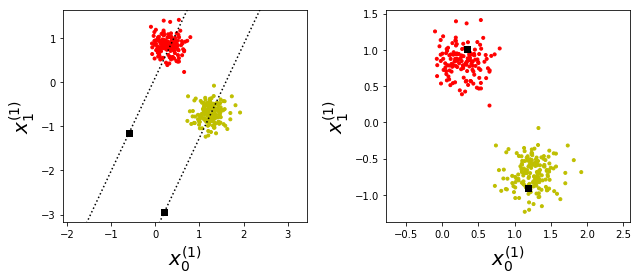

In [36]:
fig = plt.figure(figsize=(9,4))

idx = (0,1)
plt.subplot(1,2,1);
ClassPlot(train[1], labels=train[0], idx=idx); plt.grid('off')
plt.plot(np.array(y0[:,idx[0]]), np.array(y0[:,idx[1]]), 'ks');
a = plt.axis()
plt.plot(np.array(v10g)[:,idx[0]], np.array(v10g)[:,idx[1]], 'k:')
plt.plot(np.array(v01g)[:,idx[0]], np.array(v01g)[:,idx[1]], 'k:')
plt.axis(a);
if not print_it:
    plt.title('No Decay');

plt.xlabel(r'$x^{(1)}_0$', fontsize=20);
plt.ylabel(r'$x^{(1)}_1$', fontsize=20);

plt.subplot(1,2,2);
ClassPlot(train[1], labels=train[0], idx=idx); plt.grid('off')
plt.plot(np.array(y1[:,idx[0]]), np.array(y1[:,idx[1]]), 'ks');
plt.xlabel(r'$x^{(1)}_0$', fontsize=20);
plt.ylabel(r'$x^{(1)}_1$', fontsize=20);
if not print_it:
    plt.title('With Decay');
if print_it:
    plt.savefig('generative_comparison.pdf')
plt.tight_layout();

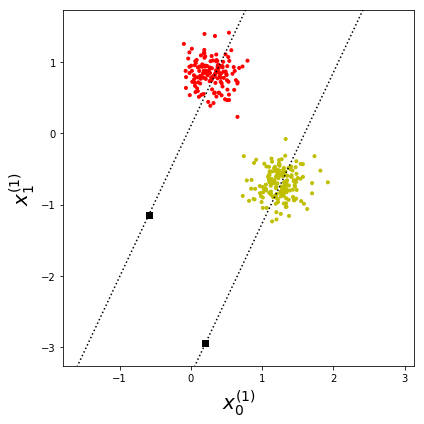

In [25]:
fig = plt.figure(figsize=(6,6))

idx = (0,1)
ClassPlot(train[1], labels=train[0], idx=idx); plt.grid('off')
plt.plot(np.array(y0[:,idx[0]]), np.array(y0[:,idx[1]]), 'ks');
a = plt.axis()
plt.plot(np.array(v10g)[:,idx[0]], np.array(v10g)[:,idx[1]], 'k:')
plt.plot(np.array(v01g)[:,idx[0]], np.array(v01g)[:,idx[1]], 'k:')
plt.axis(a);
plt.xlabel(r'$x^{(1)}_0$', fontsize=20);
plt.ylabel(r'$x^{(1)}_1$', fontsize=20);
plt.tight_layout()
if print_it:
    plt.savefig('solution_space.pdf')

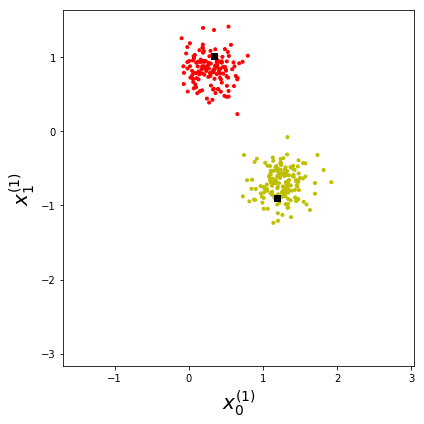

In [37]:
fig = plt.figure(figsize=(6,6))

idx = (0,1)
ClassPlot(train[1], labels=train[0], idx=idx); plt.grid('off')
plt.plot(np.array(y1[:,idx[0]]), np.array(y1[:,idx[1]]), 'ks');
plt.axis(a);
plt.xlabel(r'$x^{(1)}_0$', fontsize=20);
plt.ylabel(r'$x^{(1)}_1$', fontsize=20);
plt.tight_layout()
if print_it:
    plt.savefig('regularized.pdf')